# Multi-Feature Banking Adoption and Customer Churn Prediction
## Step 3: Exploratory Data Analysis and Visualizations

---

### Objective:
Conduct comprehensive exploratory analysis to uncover patterns and trends related to customer churn and multi-product adoption in the banking sector.

### Analysis Approach:
1. **Univariate Analysis** - Understanding individual variable distributions
2. **Bivariate Analysis** - Exploring relationships between features and churn
3. **Multivariate Analysis** - Identifying complex patterns and interactions
4. **Correlation Analysis** - Quantifying relationships between variables

### Key Questions to Answer:
- How does product adoption affect customer churn?
- Which customer segments are at highest risk of churning?
- What engagement patterns correlate with retention?
- Are there geographic or demographic factors influencing churn?

### Tools Used:
- **Pandas** - Data manipulation and analysis
- **Matplotlib** - Static visualizations
- **Seaborn** - Statistical visualizations

---

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display options and styles
pd.set_option('display.max_columns', None)                    #Shows all columns when printing dataframe
pd.set_option('display.float_format', lambda x: '%.2f' % x)   #Formats decimals to 2 places

plt.style.use('seaborn-v0_8-whitegrid')                       #Sets a clean chart style
plt.rcParams['figure.figsize'] = (10, 6)                      #Sets default chart size
plt.rcParams['font.size'] = 12                                #Sets default font size

sns.set_palette('husl')                                       #Sets color palette

print("All libraries imported successfully!")

All libraries imported successfully!


---

## 3.1 Loading Cleaned Dataset

Loading the preprocessed dataset from Step 2 (Data Preprocessing notebook).

**Dataset Details:**
- **Source:** `Bank_Churn_Cleaned.csv`
- **Records:** 9,998 customers
- **Features:** 13 columns
- **Status:** Cleaned and ready for analysis

In [2]:
# Load data from the location
file_path = r'C:/Users/HP USER/Documents/Banking-Customer-Churn-Analysis/data/Bank_Churn_Cleaned.csv'
df = pd.read_csv(file_path)

print(f"  Dataset loaded successfully!")
print(f"  Rows: {len(df):,}")
print(f"  Columns: {len(df.columns)}")

  Dataset loaded successfully!
  Rows: 9,998
  Columns: 13


In [23]:
# Defining column categories for analysis

categorical_cols = ['Geography', 'Gender']
binary_cols = ['HasCrCard', 'IsActiveMember', 'Exited']
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
target = 'Exited'

print("Column categories defined")

Column categories defined


## 3.2 Univariate Analysis

Univariate analysis examines each variable individually to understand its distribution, central tendency, and spread.

### Purpose:
- Understand the distribution of each feature
- Identify potential outliers
- Establish baseline understanding before exploring relationships

### What We'll Analyze:
1. **Target variable (Churn)** - Distribution of churned vs retained customers
2. **Numeric variables** - Distributions using histograms and box plots
3. **Categorical variables** - Frequency distributions using bar charts

---

### Target Variable Analysis: Customer Churn

The target variable `Exited` indicates whether a customer has churned (1) or been retained (0). Understanding its distribution is crucial as it forms the basis for all subsequent analysis.

CHURN ANALYSIS - TARGET VARIABLE

Retained: 7,960 customers (79.6%)
Churned:  2,038 customers (20.4%)

📊 Churn Rate: 20.4% (Approximately 1 in 4 customers)


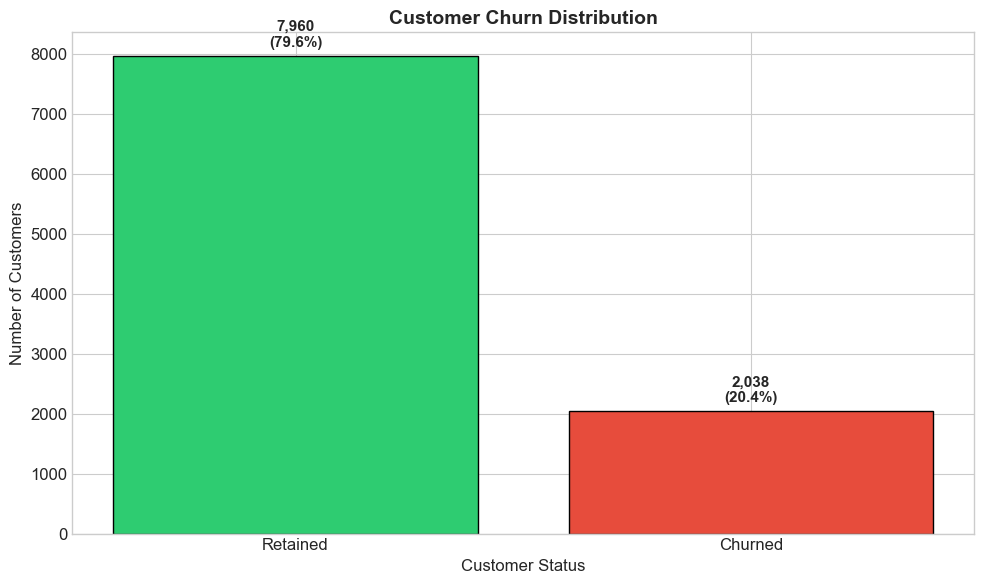

In [24]:
# VISUALIZATION 1: CHURN DISTRIBUTION

# Calculate churn statistics
churn_counts = df['Exited'].value_counts()
churn_pct = df['Exited'].value_counts(normalize=True) * 100

print("CHURN ANALYSIS - TARGET VARIABLE")
print(f"\nRetained: {churn_counts[0]:,} customers ({churn_pct[0]:.1f}%)")
print(f"Churned:  {churn_counts[1]:,} customers ({churn_pct[1]:.1f}%)")
print(f"\n📊 Churn Rate: {churn_pct[1]:.1f}% (Approximately 1 in {int(100/churn_pct[1]):.0f} customers)")

# Create bar chart
colors = ['#2ecc71', '#e74c3c']  # Green for retained, Red for churned

plt.figure()
bars = plt.bar(['Retained', 'Churned'], churn_counts, color=colors, edgecolor='black')

# Add value labels (count + percentage)
for bar, count, pct in zip(bars, churn_counts, churn_pct):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
             f'{count:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Customer Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Churn Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

### Distribution of Numeric Variables

Analyzing the distribution of continuous variables helps us understand:
- The range and spread of values
- Whether distributions are normal or skewed
- Central tendencies (mean, median)

**Variables:** CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

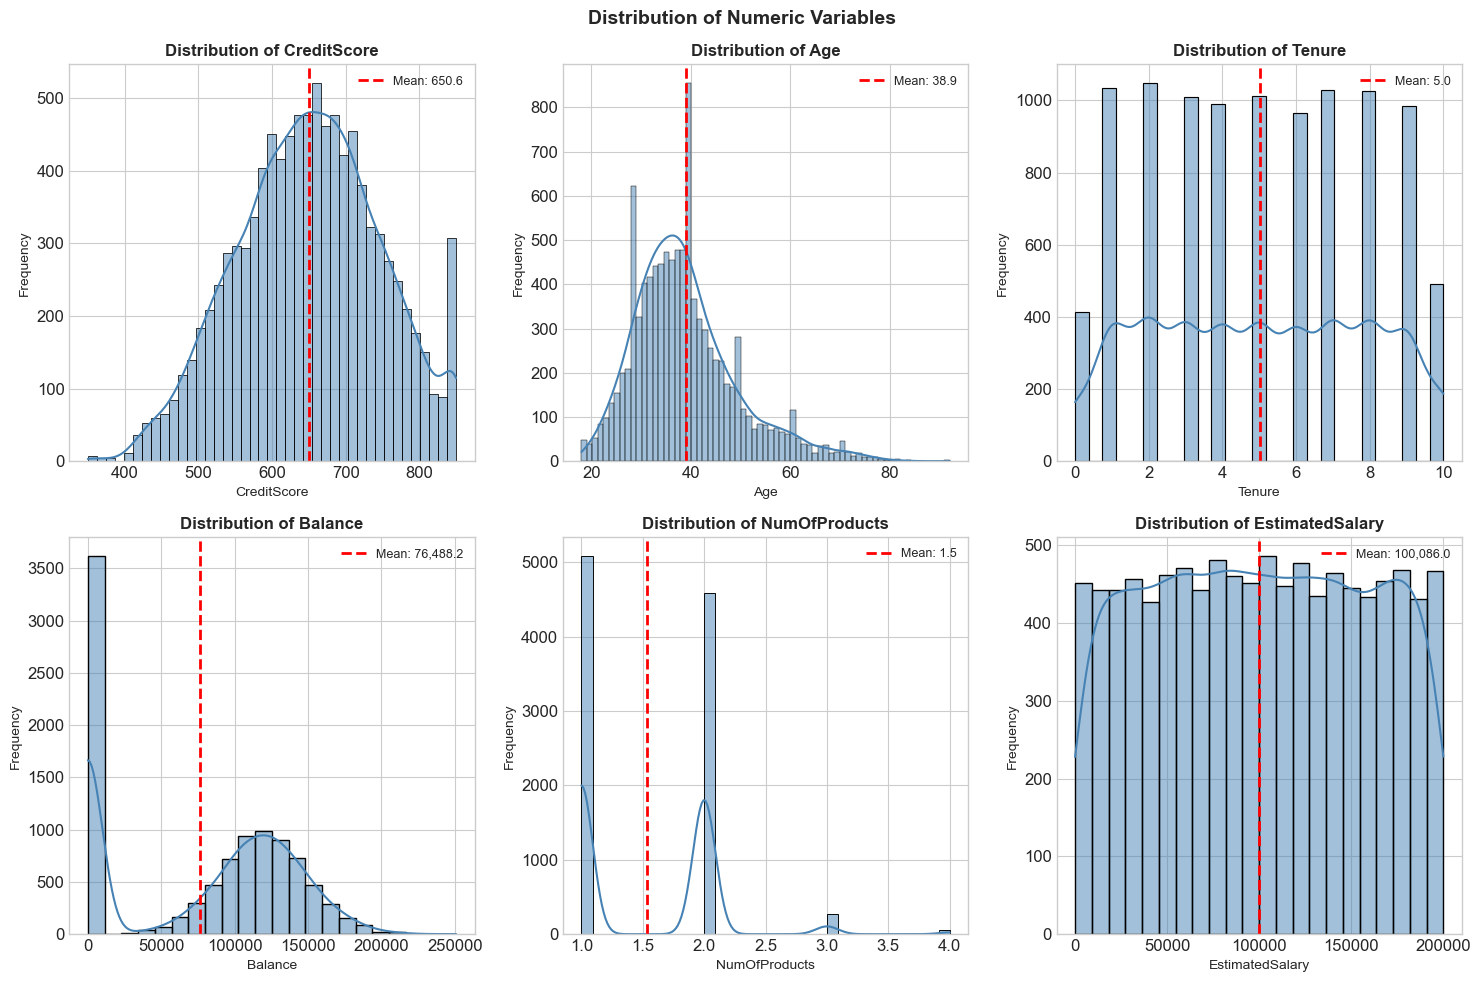


📊 NUMERIC VARIABLES SUMMARY:
       CreditScore     Age  Tenure   Balance  NumOfProducts  EstimatedSalary
count      9998.00 9998.00 9998.00   9998.00        9998.00          9998.00
mean        650.56   38.92    5.01  76488.24           1.53        100086.03
std          96.66   10.49    2.89  62396.71           0.58         57519.23
min         350.00   18.00    0.00      0.00           1.00            11.58
25%         584.00   32.00    3.00      0.00           1.00         50973.09
50%         652.00   37.00    5.00  97198.54           1.00        100218.21
75%         718.00   44.00    7.00 127641.42           2.00        149395.88
max         850.00   92.00   10.00 250898.09           4.00        199992.48


In [25]:
# VISUALIZATION 2: NUMERIC VARIABLE DISTRIBUTIONS (HISTOGRAMS)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    
    # Add mean line
    mean_val = df[col].mean()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.1f}')
    axes[idx].legend(fontsize=9)

plt.suptitle('Distribution of Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary
print("\n📊 NUMERIC VARIABLES SUMMARY:")
print(df[numeric_cols].describe().round(2))

### Outlier Detection using Box Plots

Box plots help identify:
- **Outliers** - Values far from the typical range
- **Spread** - How spread out the data is
- **Skewness** - Whether data leans to one side

Understanding outliers is important as they can significantly impact our analysis.

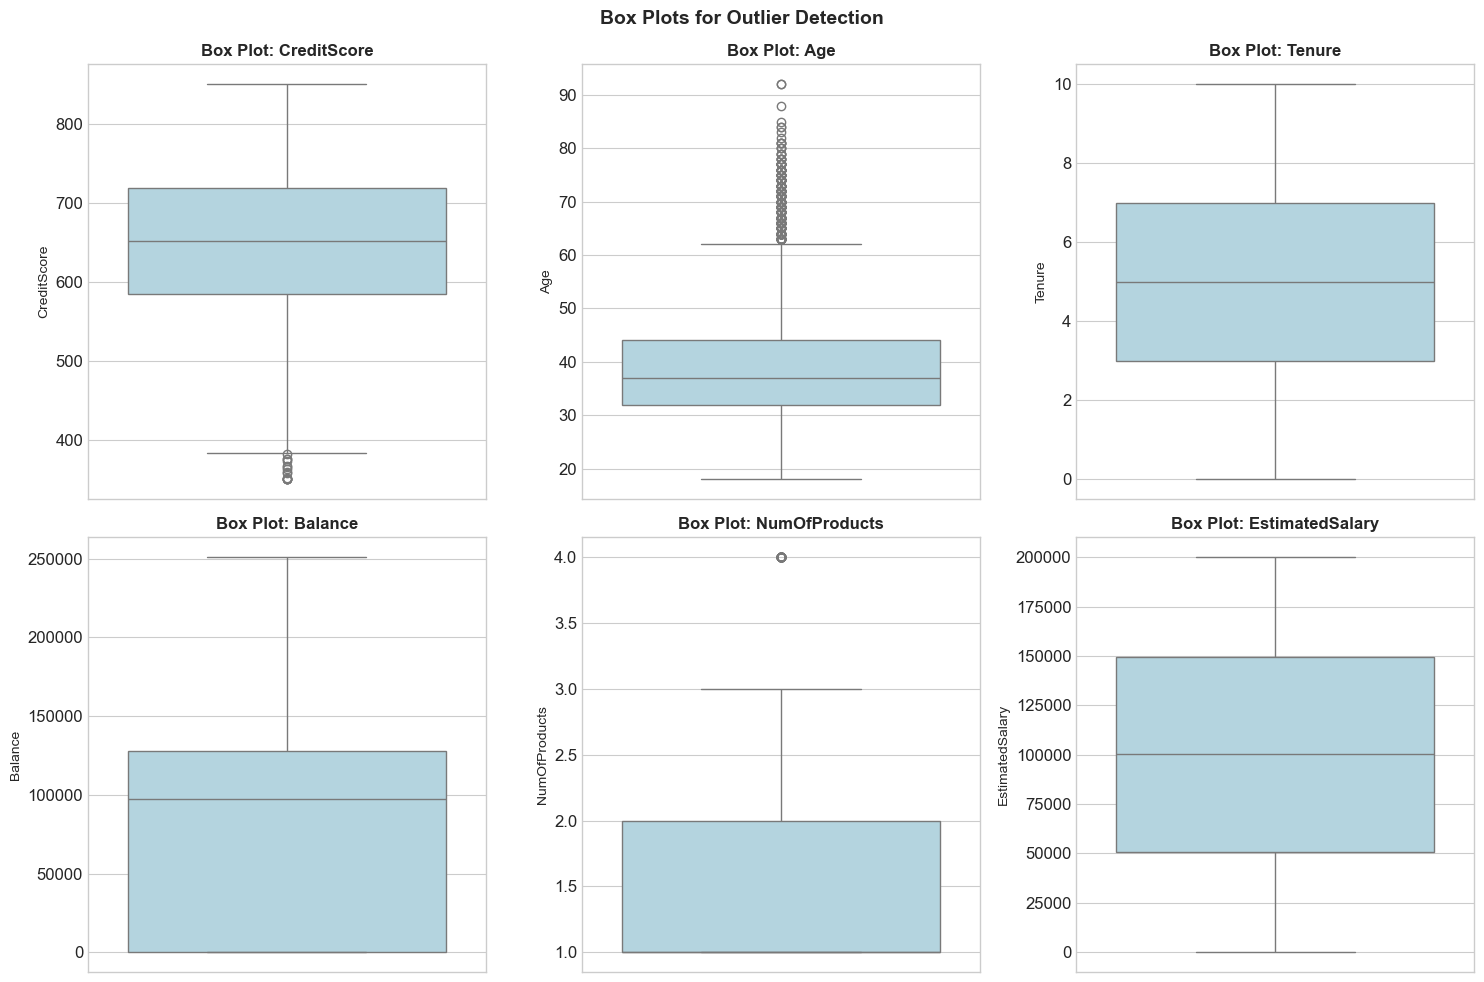


📊 OUTLIER SUMMARY (values beyond 1.5 × IQR):
CreditScore         : 15 potential outliers
Age                 : 359 potential outliers
Tenure              : 0 potential outliers
Balance             : 0 potential outliers
NumOfProducts       : 60 potential outliers
EstimatedSalary     : 0 potential outliers


In [26]:
# VISUALIZATION 3: BOX PLOTS FOR OUTLIER DETECTION

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightblue')
    axes[idx].set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)

plt.suptitle('Box Plots for Outlier Detection', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identify potential outliers using IQR method
print("\n📊 OUTLIER SUMMARY (values beyond 1.5 × IQR):")
print("="*70)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    print(f"{col:20s}: {outliers:,} potential outliers")

### Distribution of Categorical Variables

Analyzing categorical variables to understand the composition of our customer base.

**Variables:** Geography, Gender

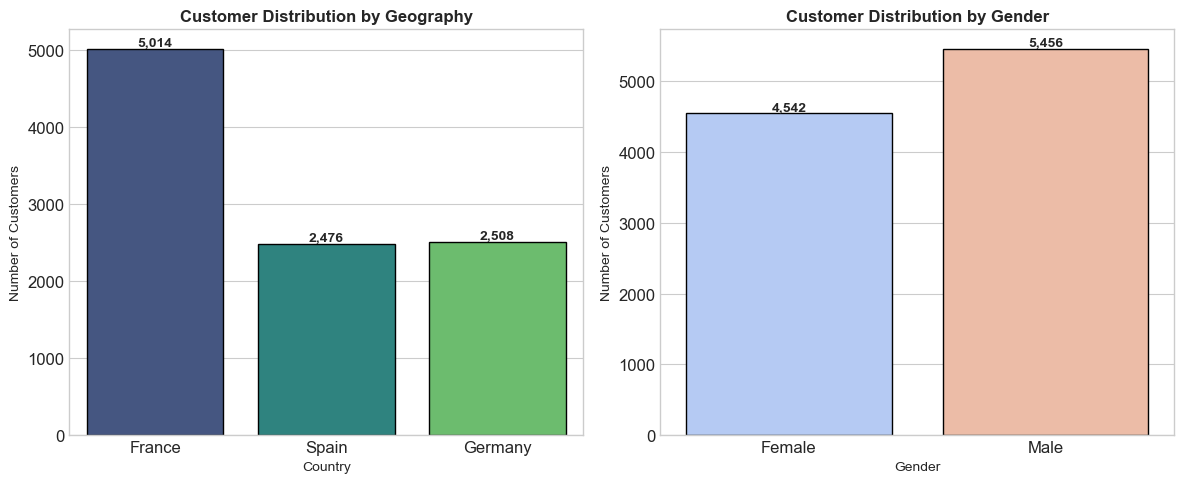

In [27]:
# VISUALIZATION 4: CATEGORICAL VARIABLE DISTRIBUTIONS

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Geography distribution
sns.countplot(data=df, x='Geography', ax=axes[0], palette='viridis', edgecolor='black')
axes[0].set_title('Customer Distribution by Geography', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Country', fontsize=10)
axes[0].set_ylabel('Number of Customers', fontsize=10)

# Add value labels
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height()):,}', 
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

# Gender distribution
sns.countplot(data=df, x='Gender', ax=axes[1], palette='coolwarm', edgecolor='black')
axes[1].set_title('Customer Distribution by Gender', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=10)
axes[1].set_ylabel('Number of Customers', fontsize=10)

# Add value labels
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height()):,}', 
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 3.3 Bivariate Analysis

Bivariate analysis explores the relationship between two variables - specifically, how each feature relates to our target variable (Churn).

### Purpose:
- Identify which factors are associated with higher/lower churn
- Discover patterns that could help predict and prevent churn
- Find actionable insights for business decisions
---

### Churn by Number of Products (KEY ANALYSIS)

This is the **central analysis** of our project. We want to understand:
- Do customers with multiple products churn less?
- Is there an optimal number of products for retention?
- What is the churn rate for each product count?


Churn Rate by Number of Products:
               Churned  Total  Churn_Rate
NumOfProducts                            
1                 1410   5085       27.70
2                  348   4587        7.60
3                  220    266       82.70
4                   60     60      100.00


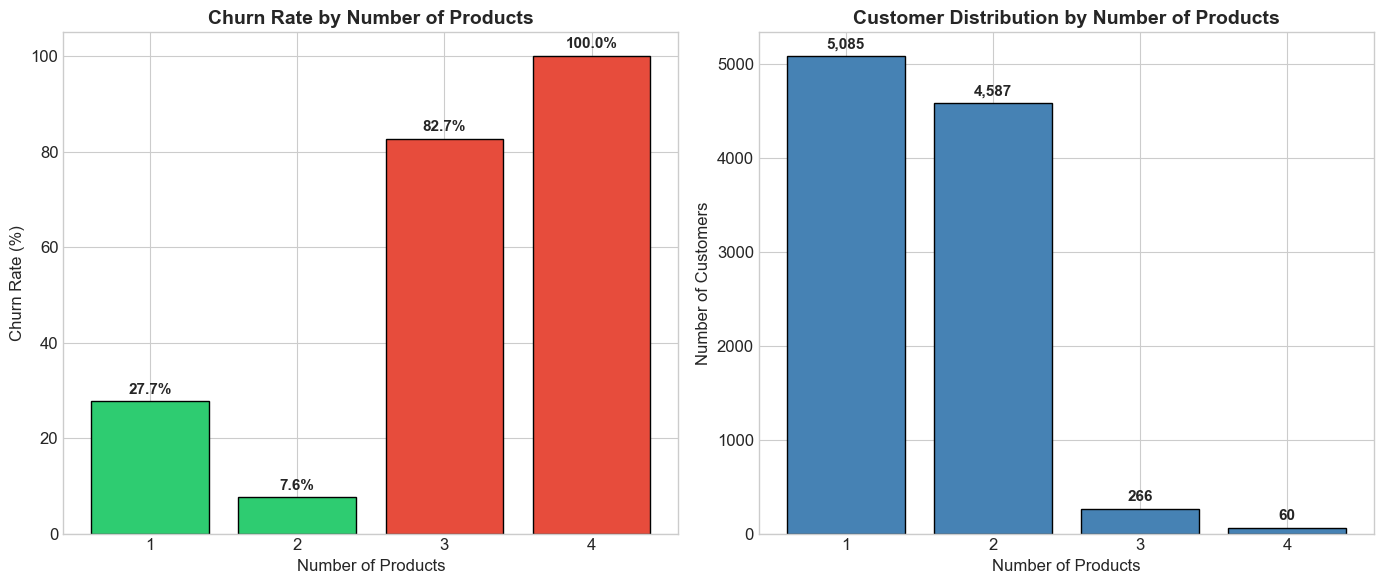

In [28]:
# VISUALIZATION 5: CHURN BY NUMBER OF PRODUCTS

churn_by_products = df.groupby('NumOfProducts')['Exited'].agg(['sum', 'count'])
churn_by_products['churn_rate'] = (churn_by_products['sum'] / churn_by_products['count'] * 100).round(1)
churn_by_products.columns = ['Churned', 'Total', 'Churn_Rate']

print("Churn Rate by Number of Products:")
print("="*50)
print(churn_by_products)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Churn rate by products
colors = ['#2ecc71', '#2ecc71', '#e74c3c', '#e74c3c']  # Green for low churn, Red for high
bars = axes[0].bar(churn_by_products.index, churn_by_products['Churn_Rate'], color=colors, edgecolor='black')

axes[0].set_xlabel('Number of Products', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_title('Churn Rate by Number of Products', fontsize=14, fontweight='bold')
axes[0].set_xticks([1, 2, 3, 4])

for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right: Customer count by products
axes[1].bar(churn_by_products.index, churn_by_products['Total'], color='steelblue', edgecolor='black')
axes[1].set_xlabel('Number of Products', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Customer Distribution by Number of Products', fontsize=14, fontweight='bold')
axes[1].set_xticks([1, 2, 3, 4])

for i, val in enumerate(churn_by_products['Total']):
    axes[1].text(i+1, val + 50, f'{val:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Churn by Geography

Analyzing churn patterns across different countries to identify geographic factors affecting retention.

Churn by Geography:
           Retained  Churned
Geography                   
France         4010     1004
Germany        2003      505
Spain          1947      529

Churn Rates: 
Geography
France    20.00
Germany   20.10
Spain     21.40
dtype: float64


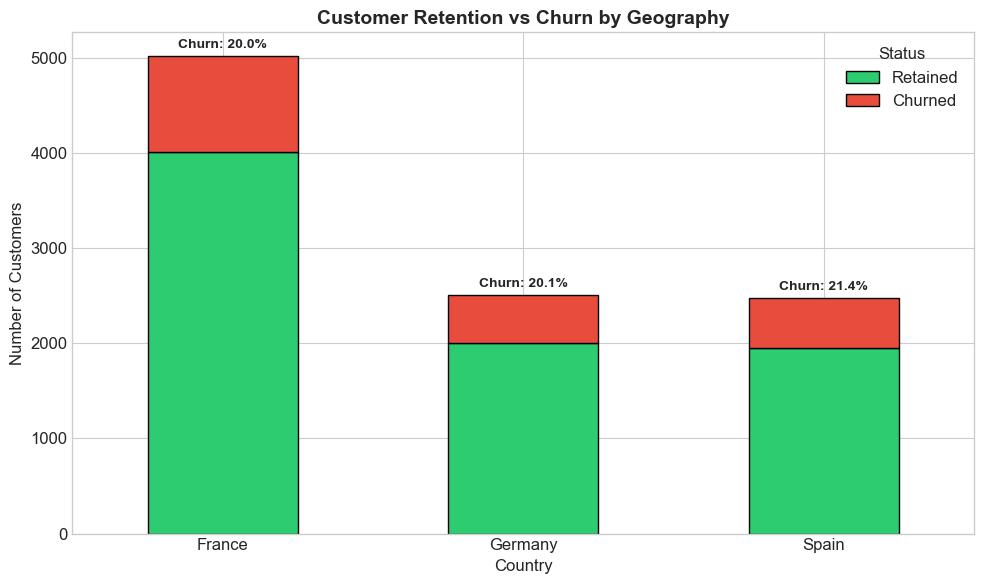

In [29]:
# VISUALIZATION 6: CHURN BY GEOGRAPHY (STACKED BAR CHART)

# Calculate counts for stacked bar
geo_churn = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)
geo_churn.columns = ['Retained', 'Churned']

# Calculate churn rate for labels
churn_rate = (geo_churn['Churned'] / (geo_churn['Retained'] + geo_churn['Churned']) * 100).round(1)

print("Churn by Geography:")
print("="*50)
print(geo_churn)
print(f"\nChurn Rates: \n{churn_rate}")
print("="*50)

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

geo_churn.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black', ax=ax)

ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Customer Retention vs Churn by Geography', fontsize=14, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.legend(title='Status', loc='upper right')

# Add churn rate labels on top
for i, (country, rate) in enumerate(churn_rate.items()):
    total = geo_churn.loc[country].sum()
    ax.text(i, total + 50, f'Churn: {rate}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Churn by Gender

Analyzing whether gender plays a role in customer churn behavior.

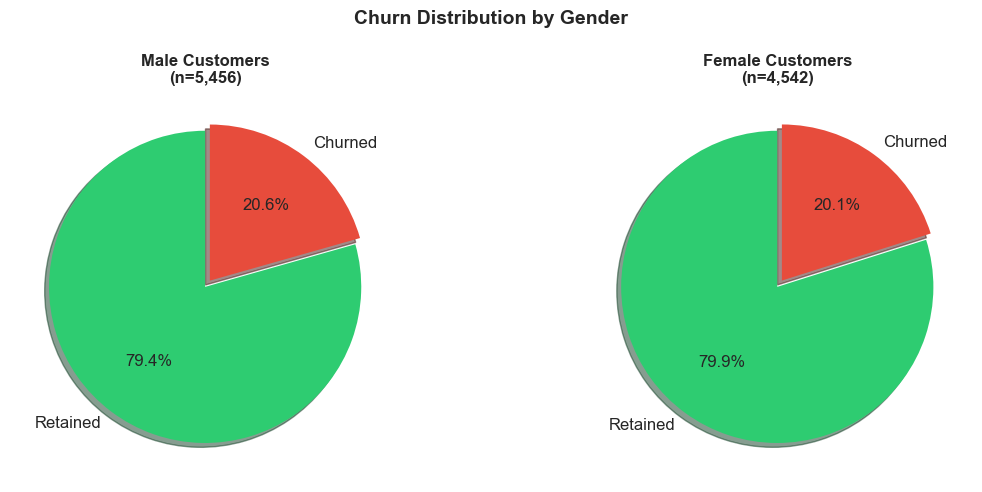


Churn Rate by Gender:
Male Churn Rate: 20.6%
Female Churn Rate: 20.1%


In [30]:
# VISUALIZATION 7: CHURN BY GENDER (PIE CHARTS)

# Calculate churn by gender
male_data = df[df['Gender'] == 'Male']['Exited'].value_counts()
female_data = df[df['Gender'] == 'Female']['Exited'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#2ecc71', '#e74c3c']  # Green for retained, Red for churned

# Male pie chart
axes[0].pie(male_data, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=colors, explode=(0, 0.05), shadow=True, startangle=90)
axes[0].set_title(f'Male Customers\n(n={len(df[df["Gender"]=="Male"]):,})', fontsize=12, fontweight='bold')

# Female pie chart
axes[1].pie(female_data, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=colors, explode=(0, 0.05), shadow=True, startangle=90)
axes[1].set_title(f'Female Customers\n(n={len(df[df["Gender"]=="Female"]):,})', fontsize=12, fontweight='bold')

plt.suptitle('Churn Distribution by Gender', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary
print("\nChurn Rate by Gender:")
print("="*50)
print(f"Male Churn Rate: {df[df['Gender']=='Male']['Exited'].mean()*100:.1f}%")
print(f"Female Churn Rate: {df[df['Gender']=='Female']['Exited'].mean()*100:.1f}%")

### Churn by Customer Engagement

Analyzing how engagement factors (Active Membership and Credit Card ownership) affect churn.

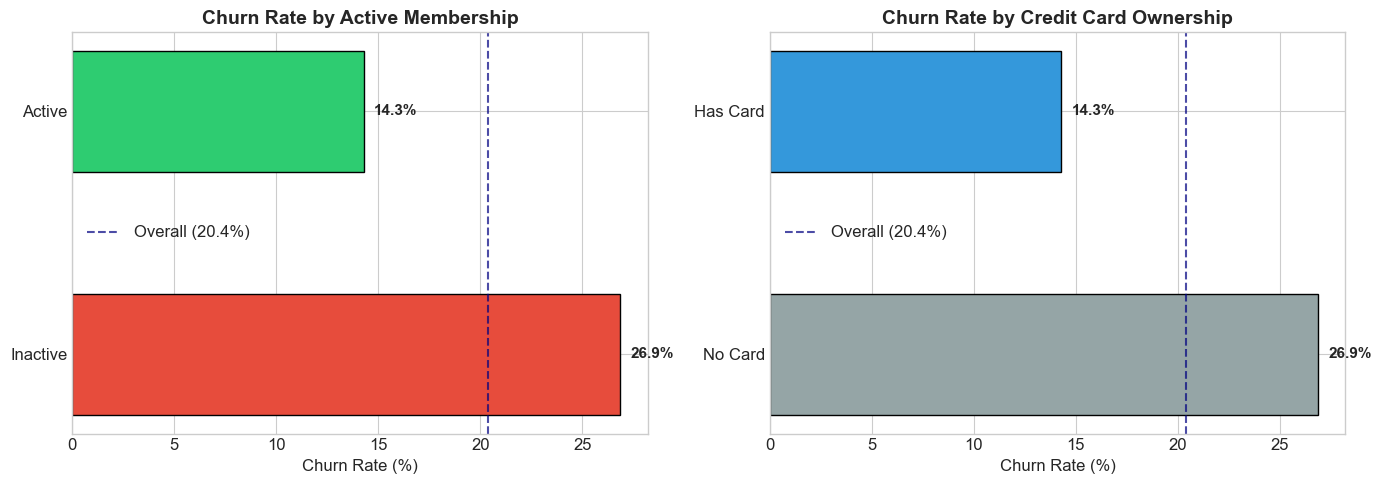

In [31]:
# VISUALIZATION 8: CHURN BY ENGAGEMENT (HORIZONTAL BAR)


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Churn by IsActiveMember
active_churn = df.groupby('IsActiveMember')['Exited'].mean() * 100
labels = ['Inactive', 'Active']
colors = ['#e74c3c', '#2ecc71']

bars1 = axes[0].barh(labels, active_churn.values, color=colors, edgecolor='black', height=0.5)
axes[0].set_xlabel('Churn Rate (%)', fontsize=12)
axes[0].set_title('Churn Rate by Active Membership', fontsize=14, fontweight='bold')
axes[0].axvline(x=20.4, color='navy', linestyle='--', alpha=0.7, label='Overall (20.4%)')
axes[0].legend()


for bar in bars1:
    axes[0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')

#Churn by HasCrCard
card_churn = df.groupby('HasCrCard')['Exited'].mean() * 100
labels = ['No Card', 'Has Card']
colors = ['#95a5a6', '#3498db']

bars2 = axes[1].barh(labels, card_churn.values, color=colors, edgecolor='black', height=0.5)
axes[1].set_xlabel('Churn Rate (%)', fontsize=12)
axes[1].set_title('Churn Rate by Credit Card Ownership', fontsize=14, fontweight='bold')
axes[1].axvline(x=20.4, color='navy', linestyle='--', alpha=0.7, label='Overall (20.4%)')
axes[1].legend()


for bar in bars2:
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Churn by Age

Analyzing how customer age relates to churn behavior.

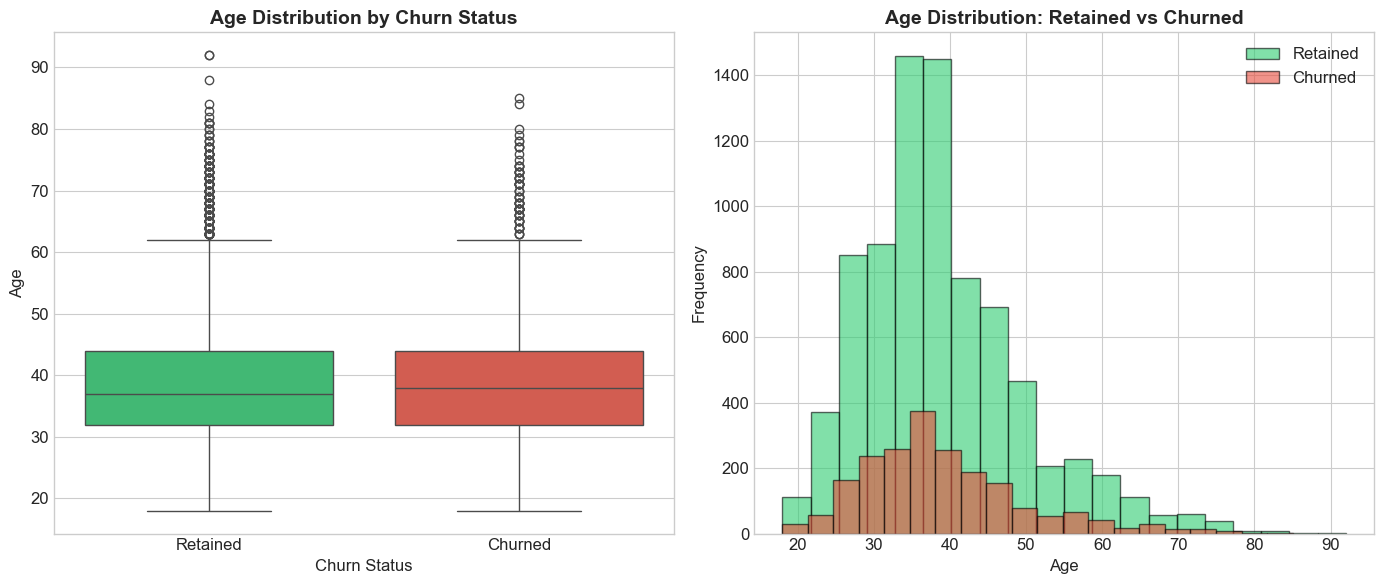


Age Statistics by Churn Status:
         count  mean   std   min   25%   50%   75%   max
Exited                                                  
0      7960.00 38.90 10.50 18.00 32.00 37.00 44.00 92.00
1      2038.00 39.10 10.60 18.00 32.00 38.00 44.00 85.00


In [32]:
# VISUALIZATION 9: AGE DISTRIBUTION BY CHURN STATUS

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Left: Box Plot
sns.boxplot(data=df, x='Exited', y='Age', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Age', fontsize=12)
axes[0].set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Retained', 'Churned'])

#Right: Histogram
axes[1].hist(df[df['Exited']==0]['Age'], bins=20, alpha=0.6, label='Retained', color='#2ecc71', edgecolor='black')
axes[1].hist(df[df['Exited']==1]['Age'], bins=20, alpha=0.6, label='Churned', color='#e74c3c', edgecolor='black')
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Age Distribution: Retained vs Churned', fontsize=14, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nAge Statistics by Churn Status:")
print(df.groupby('Exited')['Age'].describe().round(1))

## 3.4 Multivariate Analysis

Multivariate analysis examines relationships between multiple variables simultaneously to uncover complex patterns.

### Purpose:
- Understand correlations between all variables
- Identify combined effects of multiple factors on churn
- Discover hidden patterns not visible in bivariate analysis

### What We'll Analyze:
1. Correlation matrix across all numeric variables
2. Pivot table analysis (Geography × NumOfProducts → Churn)
3. Combined effect of multiple engagement factors

---

### Correlation Analysis

A correlation heatmap shows the strength and direction of relationships between numeric variables.

**Correlation Values:**
- **+1.0** = Perfect positive correlation
- **0.0** = No correlation
- **-1.0** = Perfect negative correlation

We're particularly interested in which variables correlate most strongly with `Exited` (churn).

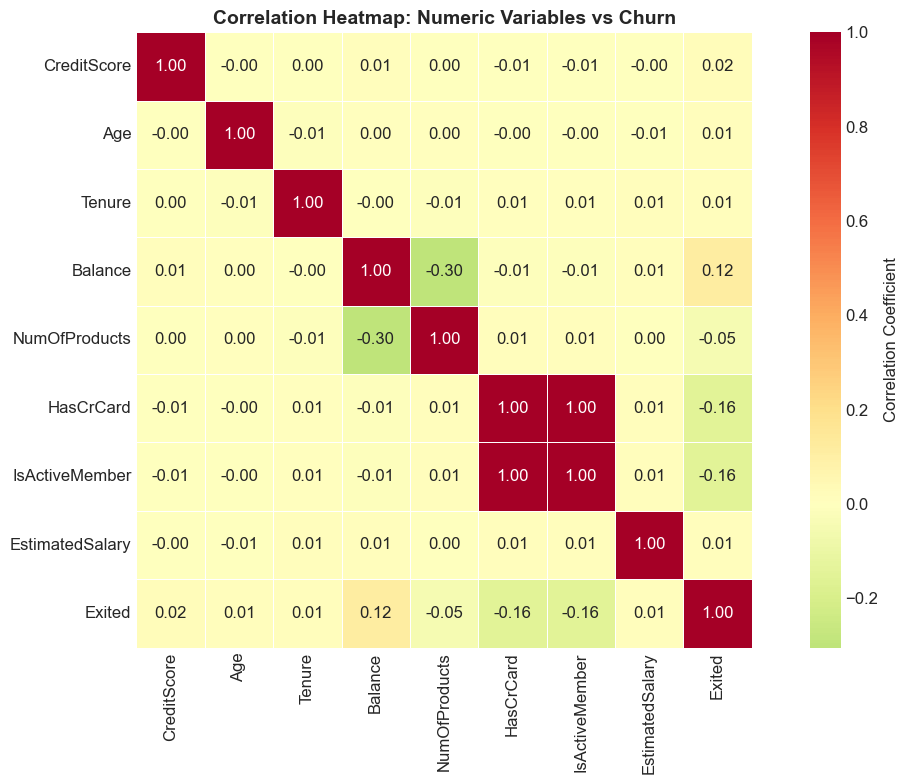


Correlation with Churn (Exited):
Balance            0.12
CreditScore        0.02
EstimatedSalary    0.01
Age                0.01
Tenure             0.01
NumOfProducts     -0.05
HasCrCard         -0.16
IsActiveMember    -0.16
Name: Exited, dtype: float64


In [33]:
# VISUALIZATION 10: CORRELATION HEATMAP

# Select numeric columns for correlation
corr_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
             'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

# Calculate correlation matrix
corr_matrix = df[corr_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn_r', center=0, 
            fmt='.2f', linewidths=0.5, square=True,
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Heatmap: Numeric Variables vs Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print correlations with Exited (churn)
print("\nCorrelation with Churn (Exited):")
print("="*50)
churn_corr = corr_matrix['Exited'].drop('Exited').sort_values(ascending=False)
print(churn_corr.round(3))

### Pivot Table Analysis: Geography × NumOfProducts

Examining churn rates across combinations of geography and product count to identify high-risk segments.

Churn Rate (%) by Geography and Number of Products:
NumOfProducts     1    2     3      4
Geography                            
France        27.20 7.40 81.70 100.00
Germany       27.00 8.20 87.30 100.00
Spain         29.40 7.20 80.30 100.00


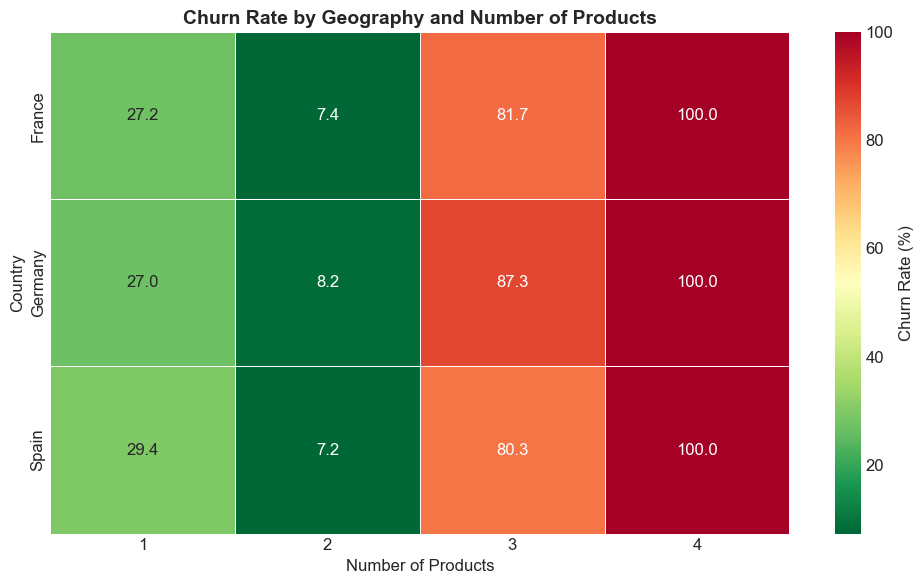

In [34]:
# VISUALIZATION 11: PIVOT TABLE HEATMAP

# Create pivot table: Churn rate by Geography and NumOfProducts
pivot_table = df.pivot_table(values='Exited', 
                              index='Geography', 
                              columns='NumOfProducts', 
                              aggfunc='mean') * 100

print("Churn Rate (%) by Geography and Number of Products:")
print("="*70)
print(pivot_table.round(1))

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn_r', fmt='.1f', 
            linewidths=0.5, cbar_kws={'label': 'Churn Rate (%)'})

plt.title('Churn Rate by Geography and Number of Products', fontsize=14, fontweight='bold')
plt.xlabel('Number of Products', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

### Balance Distribution by Churn Status

Analyzing how account balance relates to churn behavior.

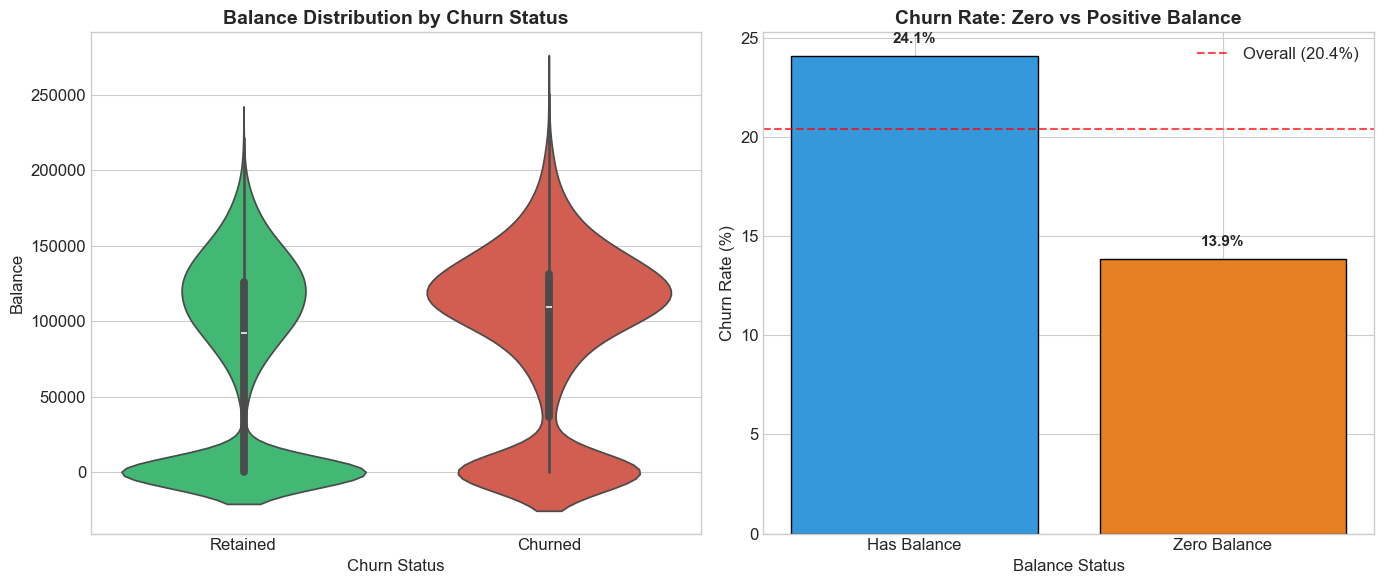


Balance Analysis Summary:
Zero Balance Customers: 3,616
Positive Balance Customers: 6,382

Churn Rate - Zero Balance: 13.9%
Churn Rate - Has Balance: 24.1%


In [35]:
# VISUALIZATION 12: BALANCE DISTRIBUTION BY CHURN (VIOLIN PLOT)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Left: Violin Plot
sns.violinplot(data=df, x='Exited', y='Balance', ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Churn Status', fontsize=12)
axes[0].set_ylabel('Balance', fontsize=12)
axes[0].set_title('Balance Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(['Retained', 'Churned'])

#Right: Box Plot (Zero vs Non-Zero Balance)
df['Balance_Status'] = df['Balance'].apply(lambda x: 'Zero Balance' if x == 0 else 'Has Balance')
churn_by_balance = df.groupby('Balance_Status')['Exited'].mean() * 100

colors = ['#3498db', '#e67e22']
bars = axes[1].bar(churn_by_balance.index, churn_by_balance.values, color=colors, edgecolor='black')
axes[1].set_xlabel('Balance Status', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].set_title('Churn Rate: Zero vs Positive Balance', fontsize=14, fontweight='bold')
axes[1].axhline(y=20.4, color='red', linestyle='--', alpha=0.7, label='Overall (20.4%)')
axes[1].legend()

for bar in bars:
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nBalance Analysis Summary:")
print("="*50)
print(f"Zero Balance Customers: {len(df[df['Balance']==0]):,}")
print(f"Positive Balance Customers: {len(df[df['Balance']>0]):,}")
print(f"\nChurn Rate - Zero Balance: {churn_by_balance['Zero Balance']:.1f}%")
print(f"Churn Rate - Has Balance: {churn_by_balance['Has Balance']:.1f}%")

## 3.5 Creating Derived Columns

Based on our analysis insights, we'll create meaningful derived features that can help segment customers and support future modeling.

**Derived Columns:**
1. **AgeGroup** - Categorize customers by age range
2. **BalanceStatus** - Zero vs Positive balance
3. **EngagementLevel** - Combined engagement score

In [36]:
#DERIVED COLUMNS

# 1. AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], 
                        bins=[0, 30, 40, 50, 60, 100], 
                        labels=['18-30', '31-40', '41-50', '51-60', '60+'])
print("AgeGroup created")

# 2. EngagementLevel (based on IsActiveMember + HasCrCard)
def engagement_level(row):
    score = row['IsActiveMember'] + row['HasCrCard']
    if score == 2:
        return 'High'
    elif score == 1:
        return 'Medium'
    else:
        return 'Low'

df['EngagementLevel'] = df.apply(engagement_level, axis=1)
print("EngagementLevel created")

AgeGroup created
EngagementLevel created


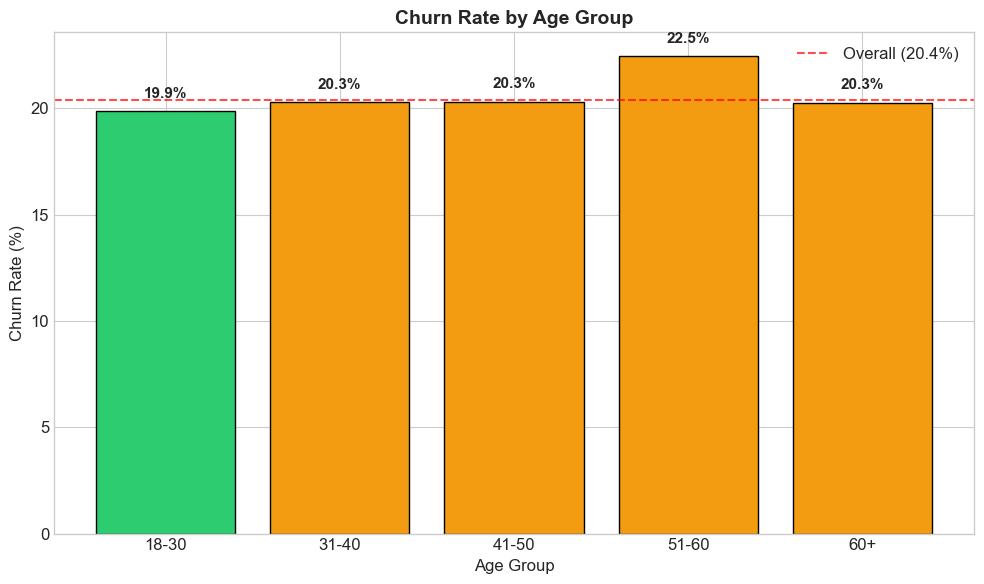


Churn Rate by Age Group:
AgeGroup
18-30   19.90
31-40   20.30
41-50   20.30
51-60   22.50
60+     20.30
Name: Exited, dtype: float64


In [37]:
# VISUALIZATION 13: CHURN BY AGE GROUP

churn_by_age = df.groupby('AgeGroup')['Exited'].mean() * 100

plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if x < 20 else '#f39c12' if x < 30 else '#e74c3c' for x in churn_by_age.values]
bars = plt.bar(churn_by_age.index, churn_by_age.values, color=colors, edgecolor='black')

plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Churn Rate by Age Group', fontsize=14, fontweight='bold')
plt.axhline(y=20.4, color='red', linestyle='--', alpha=0.7, label='Overall (20.4%)')
plt.legend()

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary
print("\nChurn Rate by Age Group:")
print("="*50)
print(churn_by_age.round(1))

Churn by Engagement Level:
                 Churn_Rate   Count
EngagementLevel                    
Low                   26.90 4847.00
Medium                  NaN     NaN
High                  14.30 5151.00


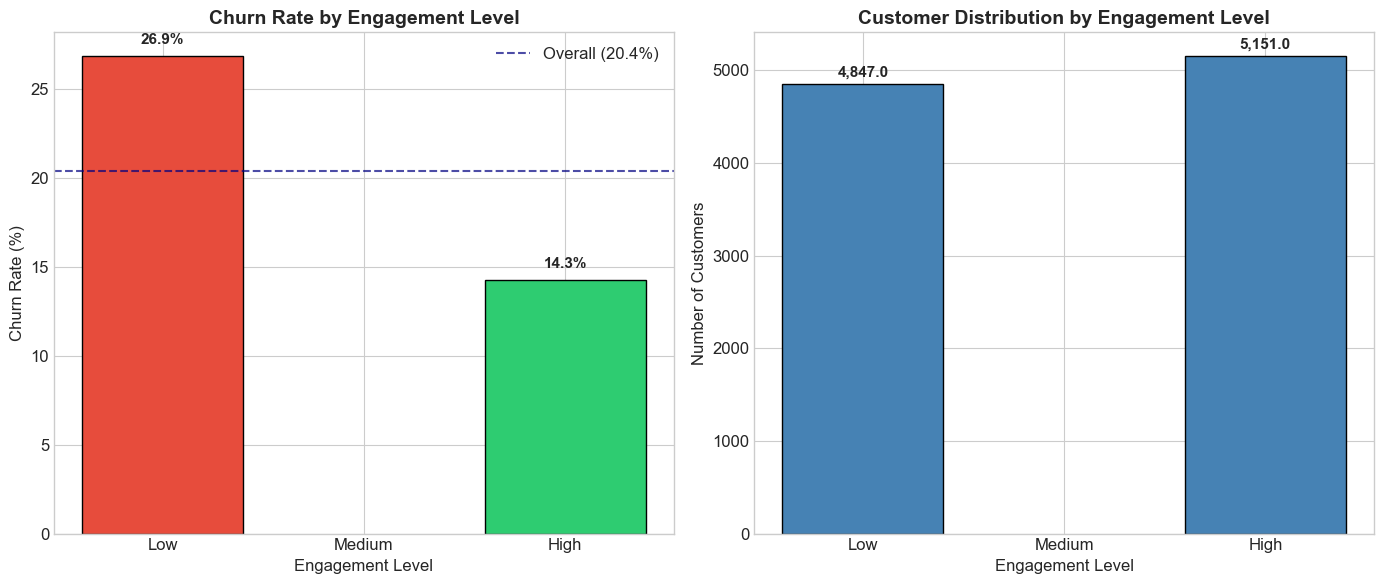

In [38]:
# VISUALIZATION 14: CHURN BY ENGAGEMENT LEVEL

churn_by_engagement = df.groupby('EngagementLevel')['Exited'].agg(['mean', 'count'])
churn_by_engagement['mean'] = churn_by_engagement['mean'] * 100
churn_by_engagement.columns = ['Churn_Rate', 'Count']

# Reorder for logical display
order = ['Low', 'Medium', 'High']
churn_by_engagement = churn_by_engagement.reindex(order)

print("Churn by Engagement Level:")
print("="*50)
print(churn_by_engagement.round(1))
print("="*50)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Churn rate by engagement
colors = ['#e74c3c', '#f39c12', '#2ecc71']
bars = axes[0].bar(churn_by_engagement.index, churn_by_engagement['Churn_Rate'], 
                   color=colors, edgecolor='black')
axes[0].set_xlabel('Engagement Level', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_title('Churn Rate by Engagement Level', fontsize=14, fontweight='bold')
axes[0].axhline(y=20.4, color='navy', linestyle='--', alpha=0.7, label='Overall (20.4%)')
axes[0].legend()

for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Right: Customer count by engagement
axes[1].bar(churn_by_engagement.index, churn_by_engagement['Count'], 
            color='steelblue', edgecolor='black')
axes[1].set_xlabel('Engagement Level', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Customer Distribution by Engagement Level', fontsize=14, fontweight='bold')

for i, val in enumerate(churn_by_engagement['Count']):
    axes[1].text(i, val + 50, f'{val:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.6 Churn by Customer Tenure (Onboarding Analysis)

Analyzing churn patterns across customer lifecycle stages, with special focus on the critical onboarding period.

Churn Rate by Tenure Group:
                    Churn_Rate  Count
TenureGroup                          
0-1yr (Onboarding)       19.10   1448
1-2yr                    22.70   1047
2-5yr                    19.50   3010
5yr+                     20.90   4493


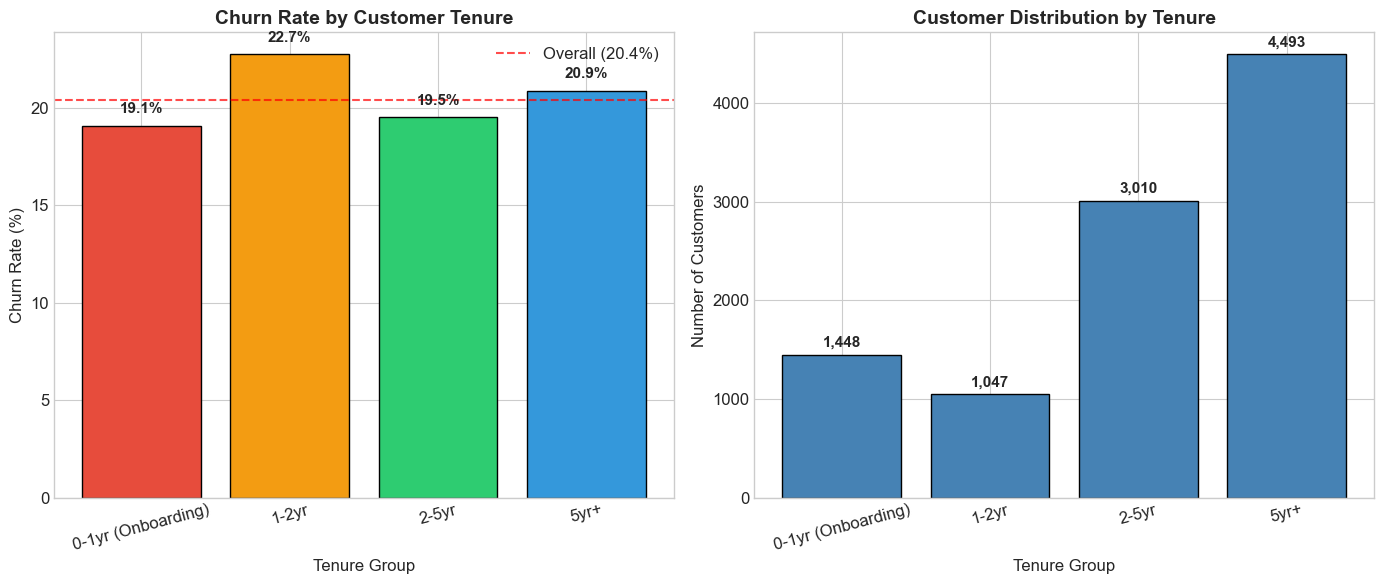

In [39]:
# VISUALIZATION 15: CHURN BY TENURE (ONBOARDING FOCUS)

# Create tenure groups focused on onboarding
df['TenureGroup'] = pd.cut(df['Tenure'], 
                            bins=[-1, 1, 2, 5, 10],
                            labels=['0-1yr (Onboarding)', '1-2yr', '2-5yr', '5yr+'])

# Calculate churn by tenure group
churn_by_tenure = df.groupby('TenureGroup')['Exited'].agg(['mean', 'count'])
churn_by_tenure['mean'] = churn_by_tenure['mean'] * 100
churn_by_tenure.columns = ['Churn_Rate', 'Count']

print("Churn Rate by Tenure Group:")
print("="*50)
print(churn_by_tenure.round(1))
print("="*50)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left: Churn rate by tenure
colors = ['#e74c3c', '#f39c12', '#2ecc71', '#3498db']
bars = axes[0].bar(churn_by_tenure.index, churn_by_tenure['Churn_Rate'], 
                   color=colors, edgecolor='black')
axes[0].set_xlabel('Tenure Group', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].set_title('Churn Rate by Customer Tenure', fontsize=14, fontweight='bold')
axes[0].axhline(y=20.4, color='red', linestyle='--', alpha=0.7, label='Overall (20.4%)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=15)

for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{bar.get_height():.1f}%', ha='center', va='bottom', 
                 fontsize=11, fontweight='bold')

# Right: Customer count by tenure
axes[1].bar(churn_by_tenure.index, churn_by_tenure['Count'], 
            color='steelblue', edgecolor='black')
axes[1].set_xlabel('Tenure Group', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Customer Distribution by Tenure', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=15)

for i, val in enumerate(churn_by_tenure['Count']):
    axes[1].text(i, val + 50, f'{val:,}', ha='center', va='bottom', 
                 fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# 3.7 Phase 3 Findings

### 📊 Product Adoption is the Strongest Churn Driver

- 2 products = 7.6% churn (optimal)
- 1 product = 27.7% churn (high risk)
- 3-4 products = 80-100% churn (anomaly)

5,085 single-product customers are the primary at-risk segment. Cross-selling them to 2 products could save ~1,000 customers annually.

### 👥 Active Membership Cuts Churn in Half

- Active members: 14.3% churn
- Inactive members: 26.9% churn
- **47% reduction** from activation

Converting inactive to active could prevent ~600 customer losses annually.

### 🌍 Demographics Have Zero Impact - Behavior is Everything

- Geography: 20.0%-21.4% across all countries
- Gender: 20.1%-20.6% for male/female
- Age: 19.9%-22.5% across all age groups

Enables unified global retention strategy, avoiding wasted resources on demographic segmentation.

### 💰 Higher Balance = Higher Churn (Counterintuitive)

- Positive balance: 24.1% churn
- Zero balance: 13.9% churn
- **73% higher churn** for customers with money

6,382 positive-balance customers need proactive engagement, not complacency.

### 🔗 Correlation Alone Misses Critical Patterns

- NumOfProducts shows weak correlation (-0.05)
- Yet it's the strongest churn predictor (7.6% vs 27.7%)
- Demonstrates limitations of linear analysis

Organizations that skip visualization in favor of correlation matrices will miss actionable insights.

---